<a href="https://colab.research.google.com/github/AveDavis/Fake_News_Detection/blob/main/FakeNewsReg.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Fake News Detection




# Fake News Detection Model


> **Warning:**  Only Run Prepare Workspace One time!


In [1]:
# Mount my google drive so that data can be acessed
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


## Prepare Workspace

---

2. retrieve data from kaggle API.
   
   **A.)** Create folder called kaggle to store json key with path "/content/gdrive/My Drive/Kaggle".
   
   **B.)** Retrive key from kaggel and place it in the new folder the file will be named "kaggle.json".
   
   **C.)** Set the Kaggle API key configuration path in Google Colab environment.


---

   


In [ ]:
# where are we?
!pwd

/content


In [ ]:
# make folder called Kaggel to hold json token
!cd gdrive/MyDrive/
!mkdir Kaggle

In [ ]:
import os
# config path to file kaggel.json
os.environ['KAGGLE_CONFIG_DIR'] = "/content/gdrive/My Drive/Kaggle"

In [ ]:
# move to new folder
%cd /content/gdrive/My Drive/Kaggle

/content/gdrive/My Drive/Kaggle


In [ ]:
# download data sets
!kaggle datasets download clmentbisaillon/fake-and-real-news-dataset

fake-and-real-news-dataset.zip: Skipping, found more recently modified local copy (use --force to force download)


In [ ]:
# Check contents of file
!ls

fake-and-real-news-dataset.zip	Fake.csv  Kaggle  kaggle.json  True.csv


In [ ]:
#unzipping the zip files and deleting the zip files
!unzip \*.zip  && rm *.zip

Archive:  fake-and-real-news-dataset.zip
replace Fake.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: 

## Upload data
---

In [2]:
# move to new folder with data
%cd /content/gdrive/My Drive/Kaggle

/content/gdrive/My Drive/Kaggle


In [3]:
#upload the needed libarys
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
#import kaggle

In [4]:
# Upload True data
true = pd.read_csv('True.csv')
true

,title,text,subject,date
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017"
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017"
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017"
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017"
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017"
...,...,...,...,...
21412,'Fully committed' NATO backs new U.S. approach...,BRUSSELS (Reuters) - NATO allies on Tuesday we...,worldnews,"August 22, 2017"
21413,LexisNexis withdrew two products from Chinese ...,"LONDON (Reuters) - LexisNexis, a provider of l...",worldnews,"August 22, 2017"
21414,Minsk cultural hub becomes haven from authorities,MINSK (Reuters) - In the shadow of disused Sov...,worldnews,"August 22, 2017"
21415,Vatican upbeat on possibility of Pope Francis ...,MOSCOW (Reuters) - Vatican Secretary of State ...,worldnews,"August 22, 2017"


In [5]:
# Upload fake data
fake = pd.read_csv('Fake.csv')
fake

,title,text,subject,date
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017"
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017"
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017"
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017"
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017"
...,...,...,...,...
23476,McPain: John McCain Furious That Iran Treated ...,21st Century Wire says As 21WIRE reported earl...,Middle-east,"January 16, 2016"
23477,JUSTICE? Yahoo Settles E-mail Privacy Class-ac...,21st Century Wire says It s a familiar theme. ...,Middle-east,"January 16, 2016"
23478,Sunnistan: US and Allied ‘Safe Zone’ Plan to T...,Patrick Henningsen 21st Century WireRemember ...,Middle-east,"January 15, 2016"
23479,How to Blow $700 Million: Al Jazeera America F...,21st Century Wire says Al Jazeera America will...,Middle-east,"January 14, 2016"


In [6]:
# Label and combine data
true['label'] = 1
fake['label'] = 0

# Use the the first 5000 data of true and fake dataset for building the model.
# Limit number of obervations because full data set takes too long to run.
frames = [true.loc[:5000][:], fake.loc[:5000][:]]

# grab unseen data for validation later on
unseen = [true.loc[5000:10000][:], fake.loc[5000:10000][:]]
# use all the data
#frames = [true, fake]

val_df = pd.concat(unseen)
df = pd.concat(frames)
df.shape

(10002, 5)

In [7]:
# create dependent and independent variables
X = df. drop('label', axis=1)
y = df['label']

In [8]:
#drop missing data
df = df.dropna()
df2 = df.copy()

# add index column for building the corpus
df2.reset_index(inplace=True)
df2['text'] = df2['text'].astype(str)
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10002 entries, 0 to 10001
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   index    10002 non-null  int64 
 1   title    10002 non-null  object
 2   text     10002 non-null  object
 3   subject  10002 non-null  object
 4   date     10002 non-null  object
 5   label    10002 non-null  int64 
dtypes: int64(2), object(4)
memory usage: 469.0+ KB


## Function Apendex

#### **Text Preprocessing function**
> This function will create a corpus from the text data frame.
 - The articles have the punctuation removed
 - Then the words are tokenized
 - Lastly

In [9]:
import re
import nltk
import pandas as pd
from nltk.tokenize import word_tokenize
from nltk.stem import SnowballStemmer
from nltk.corpus import stopwords
nltk.download('punkt')
nltk.download('stopwords')

def preprocess_text(dataframe_column, stopwords_set, stemmer=None):
    """
    Preprocess text data in a DataFrame column using optional stemming, stopword removal,
    removing punctuation, and converting to lowercase.

    Parameters:
    - dataframe_column: The DataFrame column containing text data.
    - stopwords_set: A set of stopwords to be removed from the text.
    - stemmer: An instance of a stemming algorithm (e.g., SnowballStemmer). If None, no stemming is performed.

    Returns:
    - A list containing preprocessed text.
    """
    corpus = []

    for i in range(len(dataframe_column)):
        # Handling missing values
        if pd.isnull(dataframe_column[i]):
            corpus.append("")  # or handle missing values in a way that suits your task
            continue

        # Removing punctuation and converting to lowercase
        text = re.sub('[^a-zA-Z]', ' ', dataframe_column[i]).lower()

        # Tokenization using word_tokenize
        words = word_tokenize(text)

        # Optionally perform stemming
        if stemmer:
            words = [stemmer.stem(word) for word in words]

        # Remove stopwords
        filtered_words = [word for word in words if word.lower() not in stopwords_set]

        # Join the words back into a sentence
        preprocessed_text = ' '.join(filtered_words)
        corpus.append(preprocessed_text)

    return corpus


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [10]:
import matplotlib.pyplot as plt

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    See full source and example:
    http://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html

    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [11]:
# TFidf Vectorizer set to 5000 to avoid over fitting
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf_v = TfidfVectorizer(max_features=5000, ngram_range=(1,3))

## Preprocessing
---

In this section we create the corpus and then vectorize our data. To begin to create the corpus we must remove all punctuation and stop words. The stop words used in this occasion are from nltk and no more have been added. Then we make all of our strings lowercase for consistency, and lastly we stem our tokens. The stemming is done via the nltk [snowball](https://www.nltk.org/api/nltk.stem.snowball.html?highlight=stemmer#nltk.stem.snowball.EnglishStemmer) algorithm. Snowball is an agressive stemmer but it is the most computaionally efficent and will work for our purposes.

Lastly we use[TFID Vecotrizor](https://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.TfidfVectorizer.html) from sklearn. This allows us to use the term frequency inverse document frequency metrics for detecting fake news.

In [12]:
#use preprocess_text funciton to stem our df and create corpus
snowball_stemmer = SnowballStemmer("english")
stopwords_set = set(stopwords.words('english'))
corpus = preprocess_text(df2['text'], stopwords_set, snowball_stemmer)


In [13]:
corpus[1]

'washington reuter transgend peopl allow first time enlist u militari start monday order feder court pentagon said friday presid donald trump administr decid appeal rule block transgend ban two feder appeal court one washington one virginia last week reject administr request put hold order lower court judg requir militari begin accept transgend recruit jan justic depart offici said administr challeng rule depart defens announc releas independ studi issu come week rather litig interim appeal befor occur administr decid wait dod studi continu defend presid law author district court meantim offici said speak condit anonym septemb pentagon said creat panel senior offici studi implement direct trump prohibit transgend individu serv defens depart feb submit plan trump lawyer repres current serv transgend servic member aspir recruit said expect administr appeal rule conserv major suprem court hope would happen pentagon spokeswoman heather babb said statement mandat court order depart defens p

## Fake News Classifiers

### Logit Model

In [14]:
X = tfidf_v.fit_transform(corpus).toarray()
y = df2['label']

In [15]:
# Divide the dataset into Train and Test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [16]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.linear_model import LogisticRegression
from scipy.stats import uniform


# Define the logistic regression model
logistic_regression = LogisticRegression(solver='liblinear')

# Define the hyperparameter space
param_dist = {'C': uniform(loc=0, scale=4)}  # You can adjust the scale based on your problem

# Create a random search object
random_search = RandomizedSearchCV(logistic_regression, param_distributions=param_dist, n_iter=100, cv=5, random_state=42)

# Perform the random search
random_search.fit(X_train, y_train)

# Print the best hyperparameters
print("Best Hyperparameters:", random_search.best_params_)


Best Hyperparameters: {'C': 3.8028572256396647}


Accuracy: 0.996
Confusion matrix, without normalization


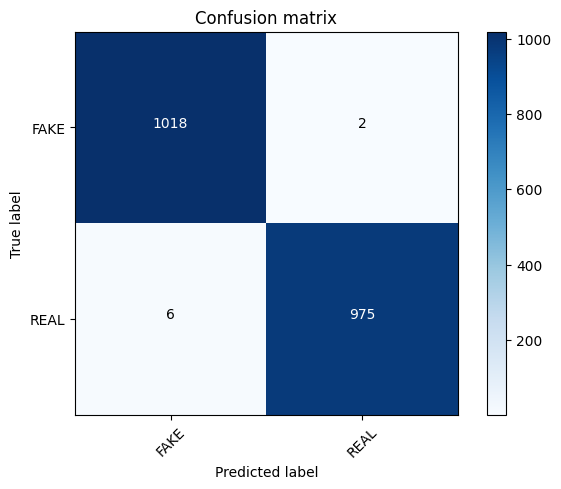

In [17]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

# Initialize the Logistic Regression model
logit_classifier = LogisticRegression(C = 3.8028572256396647)

# Fit the model on the training data
logit_classifier.fit(X_train, y_train)

# Make predictions on the testing data
pred = logit_classifier.predict(X_test)

# Calculate and print accuracy
score = metrics.accuracy_score(y_test, pred)
print("Accuracy: %0.3f" % score)

import itertools
cm = metrics.confusion_matrix(y_test, pred)
plot_confusion_matrix(cm, classes=['FAKE', 'REAL'])

In [18]:
from sklearn.metrics import classification_report, f1_score

# Assuming 'y_test' is your true labels
f1 = f1_score(y_test, pred, average='binary')  # Set average='macro' for multiclass problems

print("F1 Score:", f1)

# Generate a classification report
classification_rep = classification_report(y_test, pred)
print("Classification Report:\n", classification_rep)


F1 Score: 0.9959141981613892
Classification Report:
               precision    recall  f1-score   support

           0       0.99      1.00      1.00      1020
           1       1.00      0.99      1.00       981

    accuracy                           1.00      2001
   macro avg       1.00      1.00      1.00      2001
weighted avg       1.00      1.00      1.00      2001



#### Cross Vaildation

In [19]:
#drop missing data
df = val_df.dropna()
dfv = df.copy()

# add index column for building the corpus
dfv.reset_index(inplace=True)
dfv['text'] = dfv['text'].astype(str)
dfv.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10002 entries, 0 to 10001
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   index    10002 non-null  int64 
 1   title    10002 non-null  object
 2   text     10002 non-null  object
 3   subject  10002 non-null  object
 4   date     10002 non-null  object
 5   label    10002 non-null  int64 
dtypes: int64(2), object(4)
memory usage: 469.0+ KB


In [20]:
dfv

,index,title,text,subject,date,label
0,5000,Trump budget opens new fight among Republicans,WASHINGTON (Reuters) - Republican U.S. Represe...,politicsNews,"March 13, 2017",1
1,5001,Trump tried to call New York prosecutor Bharar...,WASHINGTON (Reuters) - Two days before U.S. At...,politicsNews,"March 12, 2017",1
2,5002,NY prosecutor’s office likely to plot similar ...,NEW YORK/WASHINGTON (Reuters) - The Trump admi...,politicsNews,"March 13, 2017",1
3,5003,Puerto Rico creditors urge extension of fiscal...,(Reuters) - A group holding more than $10 bill...,politicsNews,"March 13, 2017",1
4,5004,Biden says would have liked to be the U.S. pre...,"AUSTIN, Texas (Reuters) - Former Democratic U....",politicsNews,"March 12, 2017",1
...,...,...,...,...,...,...
9997,9996,President and First Lady Arrive in Texas: Serv...,Check out what s happening in Texas! President...,politics,"Sep 2, 2017",0
9998,9997,Heaven’s Gatekeeper? Jesse Jackson Proclaims T...,Jesse Jackson thinks he s Heaven s gatekeeper ...,politics,"Sep 2, 2017",0
9999,9998,First Lady Melania Trump Defies Critics…Rocks ...,The media will lose it again because Melania T...,politics,"Sep 2, 2017",0
10000,9999,Watch Women’s March Activist: ‘Missing Black G...,Unbelievable! Women s March Activist went off ...,politics,"Sep 2, 2017",0


In [21]:
snowball_stemmer = SnowballStemmer("english")
stopwords_set = set(stopwords.words('english'))
val_corpus = preprocess_text(dfv['text'], stopwords_set, snowball_stemmer)

In [22]:
val_corpus[1]

'washington reuter two day befor u attorney preet bharara fire presid donald trump tri call high profil new york prosecutor white hous offici said effort thank servic wish good luck u law enforc offici said bharara declin take call place thursday say want talk presid without approv superior bharara said saturday fire defi request resign move surpris becaus bharara told report novemb trump ask remain job chief feder prosecutor southern district new york includ manhattan bharara oversaw sever notabl corrupt white collar crimin case well prosecut terror suspect one obama administr holdov ask resign justic depart friday although u attorney polit appointe request trump justic depart part routin process move came surpris everi new administr replac u attorney onc white hous declin comment resign offic southern district new york handl critic busi crimin case pass feder judici system bharara overse probe new york citi mayor bill de blasio fundrais bharara said deputi joon kim would serv tempora

In [23]:
from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score

def cross_validation(model, X, y, n_splits=5):
    """
    Perform k-fold cross-validation and print average accuracy.

    Parameters:
    - model: The pre-trained machine learning model to be evaluated.
    - X: The TF-IDF feature matrix.
    - y: The target variable.
    - n_splits: Number of splits for cross-validation.

    Returns:
    - None
    """
    kf = KFold(n_splits=n_splits, shuffle=True, random_state=42)
    accuracies = []

    for train_index, test_index in kf.split(X):
        X_train, X_test = X[train_index], X[test_index]
        y_train, y_test = y.iloc[train_index], y.iloc[test_index]

        # No need to fit the model again; use the pre-trained model
        y_pred = model.predict(X_test)

        accuracy = accuracy_score(y_test, y_pred)
        accuracies.append(accuracy)

    avg_accuracy = sum(accuracies) / n_splits
    print(f'Average Accuracy: {avg_accuracy}')

In [24]:
X = tfidf_v.fit_transform(val_corpus).toarray()
y = val_df['label']

In [25]:
cross_validation(logit_classifier, X, y)

Average Accuracy: 0.5749867566216892


In [26]:
import matplotlib.pyplot as plt
from sklearn.model_selection import KFold
from sklearn.metrics import roc_curve, auc, accuracy_score, f1_score
import numpy as np

def cross_validation_with_metrics(model, X, y, n_splits=5):
    """
    Perform k-fold cross-validation, print average metrics, and plot ROC curve.

    Parameters:
    - model: The pre-trained machine learning model to be evaluated.
    - X: The TF-IDF feature matrix.
    - y: The target variable.
    - n_splits: Number of splits for cross-validation.

    Returns:
    - None
    """
    kf = KFold(n_splits=n_splits, shuffle=True, random_state=42)
    accuracies = []
    f1_scores = []
    mean_fpr = np.linspace(0, 1, 100)
    tpr_sum = 0

    plt.figure(figsize=(8, 6))

    for train_index, test_index in kf.split(X):
        X_train, X_test = X[train_index], X[test_index]
        y_train, y_test = y.iloc[train_index], y.iloc[test_index]

        # No need to fit the model again; use the pre-trained model
        y_pred_proba = model.predict_proba(X_test)[:, 1]

        fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
        roc_auc = auc(fpr, tpr)

        plt.plot(fpr, tpr, lw=1, alpha=0.3, label=f'AUC = {roc_auc:.2f}')
        tpr_sum += np.interp(mean_fpr, fpr, tpr)

        y_pred = model.predict(X_test)
        accuracy = accuracy_score(y_test, y_pred)
        f1 = f1_score(y_test, y_pred)

        accuracies.append(accuracy)
        f1_scores.append(f1)

    mean_tpr = tpr_sum / n_splits
    mean_auc = auc(mean_fpr, mean_tpr)

    plt.plot(mean_fpr, mean_tpr, color='b', label=f'Mean AUC = {mean_auc:.2f}', lw=2)
    plt.plot([0, 1], [0, 1], linestyle='--', lw=2, color='r', label='Random', alpha=0.8)

    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.legend(loc='lower right')
    plt.show()

    avg_accuracy = sum(accuracies) / n_splits
    avg_f1 = sum(f1_scores) / n_splits
    print(f'Average Accuracy: {avg_accuracy:.2f}')
    print(f'Average F1 Score: {avg_f1:.2f}')

# Example usage:
# Assume you have a pre-trained model (let's call it logit_classifier) and your TF-IDF data (X) and target variable (y).
# Replace these with your actual pre-trained model, TF-IDF data, and target variable.
# cross_validation_with_metrics(logit_classifier, X, y)


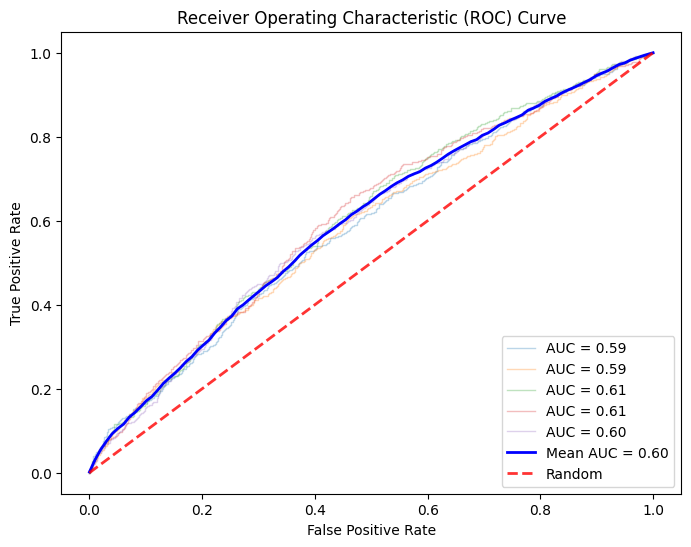

In [27]:
cross_validation_with_metrics(logit_classifier, X, y)